In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import pathlib2
import warnings
warnings.filterwarnings('ignore')

In [2]:
ps = pd.read_excel('Patch-seq log.xlsx', 'Mouse PatchSeq')
ps.head()

,"""",Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,...,Atlas Region,distance to edge,Plate,20x status,20x LIMS link,63x go no go,63x QC,Confidence,Bad dates,Notes.1
0,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.01,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,LGd,236,79,NaN,NaN,NaN,NaN,NaN,x,"did not aliquot internal, shared"
1,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.02,x,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,LGd,99,79,NaN,NaN,NaN,NaN,NaN,x,NaN
2,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.03,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,LGd,150,79,NaN,NaN,NaN,NaN,NaN,x,NaN
3,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.08.01.01,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,LGd,84,76,NaN,NaN,NaN,NaN,NaN,x,NaN
4,NaN,170104,P1,5,Gad2-IRES-Cre;Ai14-292660.08.01.02,x,x,y,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,...,LGd,44,76,NaN,NaN,NaN,NaN,NaN,x,NaN


In [3]:
ps = pd.read_csv('Patch-seq log - Mouse PatchSeq.csv')
ps['Date'] = ps['Date'].astype(int)
ps = ps[ps['Date'] > 171001]
ps.dropna(subset = ['Rig #'], inplace = True)
ps = ps[ps['Rig #'] != 'BRL']
ps.dropna(subset = ['Slice health'], inplace = True)
print ps['Rig #'].unique()
print ps['Slice health'].unique()
ps.head()

['5' '7' '6' '4' '3' '2' '1']
[ 3.  4.  2.  1.  5.]


,,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,...,distance to edge,Plate,20x status,20x LIMS link,63x go no go,63x QC,Confidence,Bad dates,Notes.1,Unnamed: 78
4017,NaN,171002,P2,5,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01.01,x,x,y,NaN,NaN,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=64349...,63x go,image_qc_passed,NaN,NaN,NaN,NaN
4018,NaN,171002,P2,5,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01.02,x,x,y,NaN,NaN,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=64349...,63x go,ready_for_dendrite_trace,NaN,NaN,NaN,NaN
4019,NaN,171002,P2,5,Chrna2-Cre_OE25;Ai14-351067.04.01.01,x,NaN,n,None,NaN,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=64349...,63x no go,NaN,NaN,NaN,NaN,NaN
4020,NaN,171002,P2,5,Chrna2-Cre_OE25;Ai14-351067.04.01.02,x,x,q,None,NaN,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=64349...,63x go,qc,NaN,NaN,NaN,NaN
4021,NaN,171002,P2,5,Chrna2-Cre_OE25;Ai14-351067.04.01.03,x,x,q,None,NaN,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=64349...,63x go,deferred,NaN,NaN,NaN,NaN


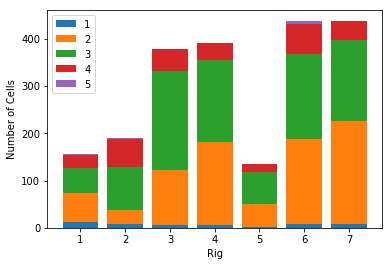

In [4]:
rigs = [1, 2, 3, 4, 5, 6, 7]
slice_health = [1, 2, 3, 4, 5]

bottom = np.zeros(len(rigs))
y = np.zeros(len(rigs))
for rating in slice_health:
    bottom = bottom + y
    y = [len(ps[(ps['Rig #'] == str(rig)) & (ps['Slice health'] == rating)]) for rig in rigs]
    plt.bar(rigs, y, bottom = bottom, label = rating)
    
plt.xlabel('Rig')
plt.ylabel('Number of Cells')
plt.legend()

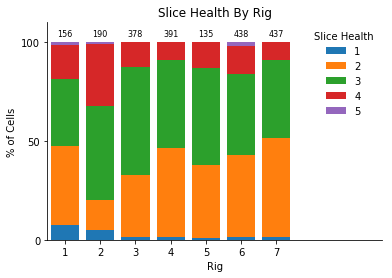

In [5]:
bottom = np.zeros(len(rigs))
y = np.zeros(len(rigs))
total = np.zeros(len(rigs))

for rating in slice_health:
    bottom = bottom + y
    total = [len(ps[(ps['Rig #'] == str(rig)) & pd.notnull(ps['Slice health'])]) for rig in rigs]
    y = [float(len(ps[(ps['Rig #'] == str(rig)) & (ps['Slice health'] == rating)]))/total[rig-1]*100 for rig in rigs]
    plt.bar(rigs, y, bottom = bottom, label = rating)

axes = plt.gca()
axes.set_xlim(0.5, 10)
plt.xticks([1, 2, 3, 4, 5, 6, 7])
axes.set_ylim(0, 110)
plt.yticks([0, 50, 100])
plt.xlabel('Rig')
plt.ylabel('% of Cells')
plt.title('Slice Health By Rig', loc = 'center')
#plt.tight_layout(pad=.2)
plt.legend(title = 'Slice Health', frameon = False)
sns.despine()

for rig, n in zip(rigs, total):
    plt.text(rig, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
plt.savefig('Slice Health By Rig.png')

In [6]:
#home = pathlib2.Path.home()
#full_path = home/'Documents'/'Stash'/'ps-metadata-analysis'/'data'/'patch_seq_log_mouse.csv'
#full_path = str(full_path)
#initial = pd.read_csv(full_path)
initial = pd.read_csv('Patch-seq log - Mouse PatchSeq.csv')

In [7]:
ps = initial[['Date', 'Rig #', 'Slice health']]
#ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps['Date'] = ps['Date'].astype(int)
ps = ps[ps['Date'] > 171001]
ps.dropna(subset = ['Slice health'], inplace = True)
ps = ps[(ps['Rig #'] == '1') | (ps['Rig #'] == '2') | (ps['Rig #'] == '3') | (ps['Rig #'] == '4') 
        | (ps['Rig #'] == '5') | (ps['Rig #'] == '6') | (ps['Rig #'] == '7') | (ps['Rig #'] == '8')]
ps.head()

,Date,Rig #,Slice health
4017,171002,5,3.0
4018,171002,5,3.0
4019,171002,5,3.0
4020,171002,5,4.0
4021,171002,5,3.0


In [8]:
ps1 = ps.groupby(['Rig #', 'Slice health']).size().reset_index(name = 'counts')
ps1

,Rig #,Slice health,counts
0,1,1.0,12
1,1,2.0,62
2,1,3.0,53
3,1,4.0,27
4,1,5.0,2
5,2,1.0,9
6,2,2.0,29
7,2,3.0,91
8,2,4.0,59
9,2,5.0,2


In [9]:
ps2 = ps1.set_index(['Rig #', 'Slice health']).unstack(level = -1).fillna(0)
ps2

counts                         
Slice health    1.0    2.0    3.0   4.0  5.0
Rig #                                       
1              12.0   62.0   53.0  27.0  2.0
2               9.0   29.0   91.0  59.0  2.0
3               5.0  118.0  208.0  47.0  0.0
4               6.0  175.0  174.0  36.0  0.0
5               1.0   50.0   66.0  18.0  0.0
6               7.0  180.0  180.0  63.0  8.0
7               7.0  218.0  172.0  40.0  0.0

In [10]:
ps_percent = ps2.div(ps2.sum(1), axis = 0)*100
ps_percent

counts                                           
Slice health       1.0        2.0        3.0        4.0       5.0
Rig #                                                            
1             7.692308  39.743590  33.974359  17.307692  1.282051
2             4.736842  15.263158  47.894737  31.052632  1.052632
3             1.322751  31.216931  55.026455  12.433862  0.000000
4             1.534527  44.757033  44.501279   9.207161  0.000000
5             0.740741  37.037037  48.888889  13.333333  0.000000
6             1.598174  41.095890  41.095890  14.383562  1.826484
7             1.601831  49.885584  39.359268   9.153318  0.000000

In [11]:
ps_totals = list(ps2.sum(1))
ps_totals = [int(x) for x in ps_totals]
ps_totals

[156, 190, 378, 391, 135, 438, 437]

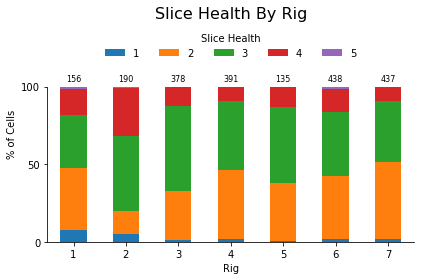

In [12]:
ax1 = ps_percent.plot(kind = 'bar', stacked = True)

axes = plt.gca()
axes.set_xlim(-0.5, 6.5)
plt.xticks(rotation = 0)
axes.set_ylim(0, 140)
plt.yticks([0, 50, 100])
sns.despine()
ax1.spines['left'].set_bounds(0, 100)
ax1.spines['bottom'].set_bounds(-0.5, 6.5)

plt.xlabel('Rig')
plt.ylabel('% of Cells')
plt.title('Slice Health By Rig', loc = 'center', fontsize = 16)
plt.legend(slice_health, loc = 'upper center', title = 'Slice Health', frameon = False, ncol = 5)
plt.tight_layout()

for rig, n in zip(rigs, ps_totals):
    plt.text(rig-1, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
plt.savefig('Slice Health By Rig.png')

In [13]:
initial = pd.read_csv('WOD testing and analysis - PilotData.csv')

In [14]:
wod = initial[['Rig', 'WOD?']]
wod.dropna(subset = ['Rig'], inplace = True)
wod.dropna(subset = ['WOD?'], inplace = True)
wod['Rig'] = wod['Rig'].astype(int)
wod = wod[(wod['WOD?'] == 'yes') | (wod['WOD?'] == 'no')]
wod.head()

,Rig,WOD?
2,6,yes
3,5,no
4,6,yes
5,7,no
6,4,no


In [15]:
wod1 = wod.groupby(['Rig', 'WOD?']).size().reset_index(name = 'counts')
wod1

,Rig,WOD?,counts
0,1,no,22
1,1,yes,21
2,2,no,34
3,2,yes,31
4,3,no,44
5,3,yes,26
6,4,no,30
7,4,yes,41
8,5,no,6
9,5,yes,5


In [16]:
wod2 = wod1.set_index(['Rig', 'WOD?']).unstack(level = -1)
wod2

counts    
WOD?     no yes
Rig            
1        22  21
2        34  31
3        44  26
4        30  41
5         6   5
6        29  49
7        34  49

In [17]:
wod_percent = wod2.div(wod2.sum(1), axis = 0)*100
wod_percent

counts           
WOD?         no        yes
Rig                       
1     51.162791  48.837209
2     52.307692  47.692308
3     62.857143  37.142857
4     42.253521  57.746479
5     54.545455  45.454545
6     37.179487  62.820513
7     40.963855  59.036145

In [18]:
wod_totals = list(wod2.sum(1))
wod_totals = [int(x) for x in wod_totals]
wod_totals

[43, 65, 70, 71, 11, 78, 83]

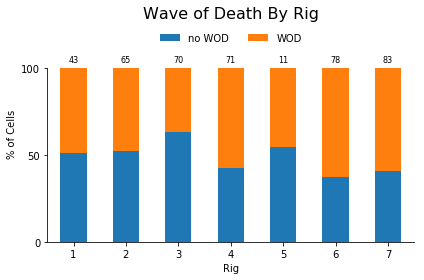

In [19]:
ax2 = wod_percent.plot(kind = 'bar', stacked = True)

axes = plt.gca()
axes.set_xlim(-0.5, 6.5)
plt.xticks(rotation = 0)
axes.set_ylim(0, 125)
plt.yticks([0, 50, 100])
sns.despine()
ax2.spines['left'].set_bounds(0, 100)
ax2.spines['bottom'].set_bounds(-0.5, 6.5)

plt.xlabel('Rig')
plt.ylabel('% of Cells')
plt.title('Wave of Death By Rig', loc = 'center', fontsize = 16)
plt.legend(['no WOD', 'WOD'], loc = 'upper center', frameon = False, ncol = 2)
plt.tight_layout()

for rig, n in zip(rigs, wod_totals):
    plt.text(rig-1, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
plt.savefig('WOD By Rig.png')

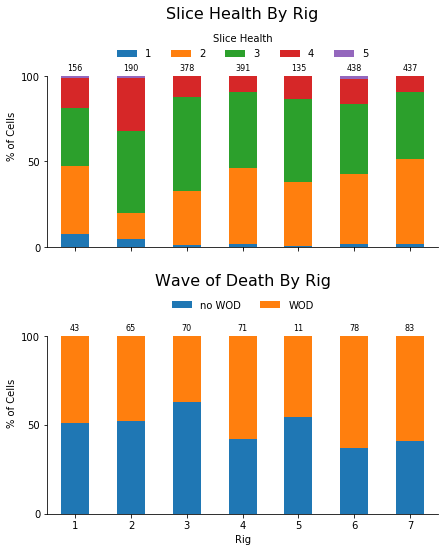

In [20]:
fig = plt.figure(figsize=(7, 9))
ax1 = fig.add_subplot(211)
ps_percent.plot(ax = ax1, kind = 'bar', stacked = True, sharex = True, 
                xlim = (-0.5, 6.5), ylim = (0, 130), rot = 0, yticks = [0, 50, 100])
sns.despine()
ax1.spines['left'].set_bounds(0, 100)
ax1.set_xlabel('Rig')
ax1.set_ylabel('% of Cells')
ax1.set_title('Slice Health By Rig', loc = 'center', fontsize = 16)
ax1.legend(slice_health, loc = 'upper center', title = 'Slice Health', frameon = False, ncol = 5)

for rig, n in zip(rigs, ps_totals):
    plt.text(rig-1, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
ax2 = fig.add_subplot(212)
wod_percent.plot(ax = ax2, kind = 'bar', stacked = True, sharex = True,
                 xlim = (-0.5, 6.5), ylim = (0, 125), rot = 0, yticks = [0, 50, 100])
sns.despine()
ax2.spines['left'].set_bounds(0, 100)
ax2.set_xlabel('Rig')
ax2.set_ylabel('% of Cells')
ax2.set_title('Wave of Death By Rig', loc = 'center', fontsize = 16)
ax2.legend(['no WOD', 'WOD'], loc = 'upper center', frameon = False, ncol = 2)

for rig, n in zip(rigs, wod_totals):
    plt.text(rig-1, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
plt.savefig('Combined.png')

In [21]:
wod = initial[['Rig', 'WOD?', 'Slice health']]
wod.dropna(subset = ['Rig'], inplace = True)
wod.dropna(subset = ['WOD?'], inplace = True)
wod.dropna(subset = ['Slice health'], inplace = True)
wod['Rig'] = wod['Rig'].astype(int)
wod['Slice health'] = wod['Slice health'].astype(int)
wod = wod[(wod['WOD?'] == 'yes') | (wod['WOD?'] == 'no')]
wod.head()

,Rig,WOD?,Slice health
60,7,no,2
61,7,yes,3
63,7,yes,4
64,3,no,3
65,6,no,4


In [22]:
wod1 = wod.groupby(['Rig', 'WOD?', 'Slice health']).size().reset_index(name = 'counts')
wod1

,Rig,WOD?,Slice health,counts
0,1,no,1,4
1,1,no,2,8
2,1,no,3,5
3,1,no,4,2
4,1,yes,1,2
5,1,yes,2,11
6,1,yes,3,3
7,2,no,2,5
8,2,no,3,14
9,2,no,4,3


In [23]:
wod2 = wod1.set_index(['Rig', 'WOD?', 'Slice health']).unstack(level = -1).fillna(0)
wod2

counts                      
Slice health      1     2     3    4    5
Rig WOD?                                 
1   no          4.0   8.0   5.0  2.0  0.0
    yes         2.0  11.0   3.0  0.0  0.0
2   no          0.0   5.0  14.0  3.0  0.0
    yes         2.0  12.0   5.0  0.0  0.0
3   no          0.0   7.0  16.0  4.0  1.0
    yes         0.0   7.0   7.0  1.0  0.0
4   no          0.0   6.0  12.0  3.0  0.0
    yes         0.0  18.0   5.0  1.0  0.0
6   no          0.0   7.0  10.0  4.0  1.0
    yes         0.0  16.0   4.0  1.0  0.0
7   no          1.0   9.0   6.0  3.0  0.0
    yes         1.0  20.0   6.0  1.0  0.0

In [24]:
wod_totals = list(wod2.sum(1))
wod_totals = [int(x) for x in wod_totals]
wod_totals

[19, 16, 22, 19, 28, 15, 21, 24, 22, 21, 19, 28]

In [25]:
x = range(0, len(wod_totals)+1)
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [26]:
wod_percent = wod2.div(wod2.sum(1), axis = 0)*100
wod_percent

counts                                           
Slice health          1          2          3          4         5
Rig WOD?                                                          
1   no        21.052632  42.105263  26.315789  10.526316  0.000000
    yes       12.500000  68.750000  18.750000   0.000000  0.000000
2   no         0.000000  22.727273  63.636364  13.636364  0.000000
    yes       10.526316  63.157895  26.315789   0.000000  0.000000
3   no         0.000000  25.000000  57.142857  14.285714  3.571429
    yes        0.000000  46.666667  46.666667   6.666667  0.000000
4   no         0.000000  28.571429  57.142857  14.285714  0.000000
    yes        0.000000  75.000000  20.833333   4.166667  0.000000
6   no         0.000000  31.818182  45.454545  18.181818  4.545455
    yes        0.000000  76.190476  19.047619   4.761905  0.000000
7   no         5.263158  47.368421  31.578947  15.789474  0.000000
    yes        3.571429  71.428571  21.428571   3.571429  0.000000

In [27]:
wod_no = pd.concat([wod_percent[:1], wod_percent[2:3], wod_percent[4:5], wod_percent[6:7], wod_percent[8:9], wod_percent[10:11]])
wod_no

counts                                           
Slice health          1          2          3          4         5
Rig WOD?                                                          
1   no        21.052632  42.105263  26.315789  10.526316  0.000000
2   no         0.000000  22.727273  63.636364  13.636364  0.000000
3   no         0.000000  25.000000  57.142857  14.285714  3.571429
4   no         0.000000  28.571429  57.142857  14.285714  0.000000
6   no         0.000000  31.818182  45.454545  18.181818  4.545455
7   no         5.263158  47.368421  31.578947  15.789474  0.000000

In [28]:
wod_yes = pd.concat([wod_percent[1:2], wod_percent[3:4], wod_percent[5:6], wod_percent[7:8], wod_percent[9:10], wod_percent[11:12]])
wod_yes

counts                                     
Slice health          1          2          3         4    5
Rig WOD?                                                    
1   yes       12.500000  68.750000  18.750000  0.000000  0.0
2   yes       10.526316  63.157895  26.315789  0.000000  0.0
3   yes        0.000000  46.666667  46.666667  6.666667  0.0
4   yes        0.000000  75.000000  20.833333  4.166667  0.0
6   yes        0.000000  76.190476  19.047619  4.761905  0.0
7   yes        3.571429  71.428571  21.428571  3.571429  0.0

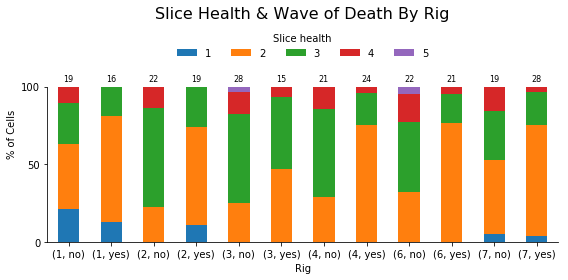

In [29]:
wod_percent.plot(kind = 'bar', stacked = True, figsize = (8, 4))

axes = plt.gca()
plt.xticks(rotation = 0)
axes.set_ylim(0, 140)
plt.yticks([0, 50, 100])
sns.despine()
axes.spines['left'].set_bounds(0, 100)

plt.xlabel('Rig')
plt.ylabel('% of Cells')
plt.title('Slice Health & Wave of Death By Rig', loc = 'center', fontsize = 16)
plt.legend(slice_health, title = 'Slice health', loc = 'upper center', frameon = False, ncol = 5)
plt.tight_layout()

for i, n in zip(x, wod_totals):
    plt.text(i, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
plt.savefig('Slice Health & WOD By Rig.png')

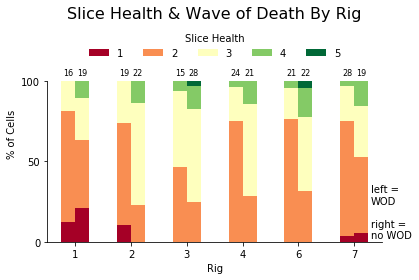

In [30]:
ax1 = wod_no.plot(kind = 'bar', stacked = True, ylim = (0, 135), yticks = [0, 50, 100], width = 0.25, position = 0, colormap = 'RdYlGn')
wod_yes.plot(ax = ax1, kind = 'bar', stacked = True, rot = 0, width = 0.25, position = 1, colormap = 'RdYlGn')

ax1.set_xlim(-0.5, 5.5)
ax1.set_xticklabels(['1', '2', '3', '4', '6', '7'])
sns.despine()
ax1.spines['left'].set_bounds(0, 100)

ax1.set_xlabel('Rig')
ax1.set_ylabel('% of Cells')
ax1.set_title('Slice Health & Wave of Death By Rig', loc = 'center', fontsize = 16)
ax1.legend(slice_health, loc = 'upper center', title = 'Slice Health', frameon = False, ncol = 5)
#plt.tight_layout()

ax1.text(5.3, 2, 'left =\nWOD\n\nright =\nno WOD')
for i, n in zip(x, wod_totals):
    if i%2 == 0:
        ax1.text(i/2+0.12, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    else:
        ax1.text(i/2-0.12, 102, n, ha = 'center', va = 'bottom', fontsize = 8)
    
plt.savefig('Slice Health & WOD By Rig.png')

In [31]:
ps_log = pd.read_csv('Patch-seq log - Mouse PatchSeq.csv')
wod_log = pd.read_csv('WOD testing and analysis - PilotData.csv')

In [32]:
df = pd.merge(left = ps_log, right = wod_log, left_on = 'File', right_on = 'Slice', how = 'right')
df.to_csv('test_merge.csv')